#SDG5 - Gender equality
##Member
1.   Arissara Tirapaiboon 6309658315
2.   Orn-anong Inyawin 6309658711



#Install library

In [ ]:
!pip install rdflib==6.0.2
!pip install owlrl==6.0.2
!pip install sparqlwrapper==2.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.1/407.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: rdflib
    Found existing installation: rdflib 6.0.2
    Uninstalling rdflib-6.0.2:
      Successfully uninstalled rdflib-6.0.2


In [ ]:
#rdflib
import rdflib
from rdflib import URIRef, BNode, Literal
from rdflib import Namespace
from rdflib.namespace import CSVW, DC, DCAT, DCTERMS, DOAP, FOAF, ODRL2, ORG, OWL, PROF, PROV, RDF, RDFS, SDO, SH, SKOS, SOSA, SSN, TIME, VOID, XMLNS, XSD
from rdflib.plugins import sparql

#owlrl
import owlrl

#SPARQLWrapper
from SPARQLWrapper import SPARQLWrapper, JSON, XML, N3, TURTLE, JSONLD

#Import cdoam ontology


In [ ]:
cdoam_onto = rdflib.Graph().parse("gender-equality-sdg5.owl", format="application/rdf+xml")

In [ ]:
print(cdoam_onto.serialize(format="xml"))

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:dcterms="http://purl.org/dc/terms/"
   xmlns:owl="http://www.w3.org/2002/07/owl#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
>
  <rdf:Description rdf:about="https://lst.nectec.or.th/cdoam/goal-5-gender-equality/sdg-5-gender-equality-by-arissaraorn-anong-by-oum2544.oc@gmail.com-1701166537/Economic_Rights">
    <rdf:type rdf:resource="http://www.w3.org/2002/07/owl#Class"/>
    <rdfs:label>Economic_Rights</rdfs:label>
    <rdfs:subClassOf rdf:resource="https://lst.nectec.or.th/cdoam/goal-5-gender-equality/sdg-5-gender-equality-by-arissaraorn-anong-by-oum2544.oc@gmail.com-1701166537/Economic_Empowerment_and_Policy_Reforms"/>
    <rdfs:subClassOf rdf:nodeID="Nb59abd3b4e0b47a2bb5af3d9a90b3d9f"/>
    <rdfs:subClassOf rdf:nodeID="N44a869c5b34f42f797f4eb4bfe1b667d"/>
  </rdf:Description>
  <rdf:Description rdf:about="https:

In [ ]:
print("Nodes in Graph =", len(cdoam_onto.all_nodes()))

Nodes in Graph = 104


#Ontology preparation

###abox

In [ ]:
my_abox_text = '''
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix skos: <http://www.w3.org/2004/02/skos/core#> .
@prefix dcam: <http://purl.org/dc/dcam/> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix terms: <http://purl.org/dc/terms/> .

@prefix mycdoam: <https://lst.nectec.or.th/cdoam/goal-5-gender-equality/sdg-5-gender-equality-by-arissaraorn-anong-by-oum2544.oc@gmail.com-1701166537/> .
@prefix ex: <http://example.org/> .

mycdoam:SDG a skos:Concept ;
  skos:broaderTransitive mycdoam:Gender_equality .

mycdoam:Gender_equality a skos:Concept ;
  foaf:member mycdoam:Economic_Empowerment_and_Policy_Reforms ,
                      mycdoam:Addressing_GenderBased_Violence_and_Equality .

mycdoam:Project_in_Thai a foaf:Group .

mycdoam:Economic_Empowerment_and_Policy_Reforms a foaf:Group ;
  foaf:member mycdoam:Technology_and_Empowerment,
                        mycdoam:Policy_Reforms,
                        mycdoam:Economic_Rights .

mycdoam:Addressing_GenderBased_Violence_and_Equality a foaf:Group ;
  foaf:member mycdoam:Valuing_Unpaid_Care_Work,
                        mycdoam:Womens_Participation_and_Leadership,
                        mycdoam:Eliminate_all_forms_of_violence,
                        mycdoam:Ending_all_forms_of_Discrimination,
                        mycdoam:Reproductive_Health_and_Rights,
                        mycdoam:Eliminating_Harmful_Practices .

mycdoam:Indicators a foaf:Group ;
  foaf:member mycdoam:Green_Indicators,
                      mycdoam:Red_Indicators,
                      mycdoam:Yellow_Indicators .

mycdoam:Green_Indicators a foaf:Group ;
  foaf:member mycdoam:Frameworks_for_gender,
                        mycdoam:Violence_by_partner,
                        mycdoam:Women_in_parlliament,
                        mycdoam:Female_land_rights .

mycdoam:Red_Indicators a foaf:Group ;
  foaf:member mycdoam:Tracking_gender_equality,
                      mycdoam:Sexual_health_access,
                      mycdoam:Violence_by_non_partner .

mycdoam:Yellow_Indicators a foaf:Group ;
  foaf:member mycdoam:Genital_mutilation,
                      mycdoam:Time_on_domestic_work,
                      mycdoam:Own_health_decisions,
                      mycdoam:Mobile_phone_ownership,
                      mycdoam:Forced_marriage,
                      mycdoam:Women_in_management,
                      mycdoam:Female_land_ownership .

ex:WE_RISE_Together_Project skos:Concept mycdoam:Project_in_Thai .
ex:Gender_equality_self_assessment_Project skos:Concept mycdoam:Project_in_Thai .
ex:HeForShe_Project skos:Concept mycdoam:Project_in_Thai .
ex:Thammasat_Childhood_Development_Center skos:Concept mycdoam:Project_in_Thai .
ex:Ethnic_Highland_Women_on_Household_Economy_Development_Project skos:Concept mycdoam:Project_in_Thai .

'''
my_abox = rdflib.Graph().parse( data=my_abox_text, format='turtle' )
print(my_abox.serialize(format="xml"))

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:foaf="http://xmlns.com/foaf/0.1/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:skos="http://www.w3.org/2004/02/skos/core#"
>
  <rdf:Description rdf:about="https://lst.nectec.or.th/cdoam/goal-5-gender-equality/sdg-5-gender-equality-by-arissaraorn-anong-by-oum2544.oc@gmail.com-1701166537/Gender_equality">
    <rdf:type rdf:resource="http://www.w3.org/2004/02/skos/core#Concept"/>
    <foaf:member rdf:resource="https://lst.nectec.or.th/cdoam/goal-5-gender-equality/sdg-5-gender-equality-by-arissaraorn-anong-by-oum2544.oc@gmail.com-1701166537/Economic_Empowerment_and_Policy_Reforms"/>
    <foaf:member rdf:resource="https://lst.nectec.or.th/cdoam/goal-5-gender-equality/sdg-5-gender-equality-by-arissaraorn-anong-by-oum2544.oc@gmail.com-1701166537/Addressing_GenderBased_Violence_and_Equality"/>
  </rdf:Description>
  <rdf:Description rdf:about="https://lst.nectec.or.th/cdoam/goal-5-gender-equality/sdg-5-gender-equal

###tbox

In [ ]:
my_tbox_text = '''
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

foaf:member rdfs:subClassOf foaf:Group .

'''

my_tbox = rdflib.Graph()
my_tbox.parse( data=my_tbox_text, format='turtle' )
print(my_tbox.serialize(format="xml"))

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
>
  <rdf:Description rdf:about="http://xmlns.com/foaf/0.1/member">
    <rdfs:subClassOf rdf:resource="http://xmlns.com/foaf/0.1/Group"/>
  </rdf:Description>
</rdf:RDF>



###skos, foaf, dcmi-terms, dbpedia

In [ ]:
dc_onto = rdflib.Graph().parse("https://www.dublincore.org/specifications/dublin-core/dcmi-terms/dublin_core_terms.ttl", format="turtle")
foaf_onto = rdflib.Graph().parse("https://web.archive.org/web/20220614105937if_/http://xmlns.com/foaf/spec/20140114.rdf", format="xml")
skos_onto = rdflib.Graph().parse("http://www.w3.org/TR/skos-reference/skos.rdf", format="xml")

#dbpedia
gender_equality_onto = rdflib.Graph().parse('http://dbpedia.org/data/Gender_equality.rdf', format="xml")
sdg5_onto = rdflib.Graph().parse('http://dbpedia.org/data/Sustainable_Development_Goal_5.rdf', format="xml")

#Combine ontology

In [ ]:
g2 = cdoam_onto + my_abox + my_tbox + sdg5_onto + gender_equality_onto + dc_onto + foaf_onto + skos_onto

In [ ]:
len(g2)

4224

####show ontology

In [ ]:
# g2.serialize('sdg5.rdf', format='application/rdf+xml')

In [ ]:
# g2.serialize('sdg5.ttl', format='turtle')

In [ ]:
print(sdg5_onto.serialize(format='n3'))

@prefix dbo: <http://dbpedia.org/ontology/> .
@prefix dbp: <http://dbpedia.org/property/> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://dbpedia.org/resource/Danish_Committee_for_Aid_to_Afghan_Refugees> dbo:wikiPageWikiLink <http://dbpedia.org/resource/Sustainable_Development_Goal_5> .

<http://dbpedia.org/resource/Development_in_the_Union_Territory_of_Jammu_and_Kashmir> dbo:wikiPageWikiLink <http://dbpedia.org/resource/Sustainable_Development_Goal_5> .

<http://dbpedia.org/resource/Energy_poverty_and_cooking> dbo:wikiPageWikiLink <http://dbpedia.org/resource/Sustainable_Development_Goal_5> .

<http://dbpedia.org/resource/Female_education> dbo:wikiPageWikiLink <http://dbpedia.org/resource/Sustainable_Development_Goal_5> .

<http://dbpedia.org/resource/Feminist_foreign_policy> dbo:w

In [ ]:
# print(g2.serialize(format='xml'))

# CSV file preaparation

In [ ]:
basic_query = '''
SELECT ?s ?p ?o
WHERE {
  ?s ?p ?o .
}
'''
result_triples = g2.query(basic_query)

In [ ]:
print(f"Query result: {len(result_triples)} triple(s)")

Query result: 4224 triple(s)


In [ ]:
for triple in result_triples:
  print(triple)
  print(triple['s'].split("/")[-1])
  print()

Streaming output truncated to the last 5000 lines.
Parvin_Ardalan

(rdflib.term.URIRef('http://xmlns.com/foaf/0.1/phone'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#Property'))
phone

(rdflib.term.URIRef("http://dbpedia.org/resource/European_Women's_Lobby"), rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'), rdflib.term.URIRef('http://dbpedia.org/resource/Gender_equality'))
European_Women's_Lobby

(rdflib.term.URIRef('http://dbpedia.org/resource/Embracing_the_Winds'), rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'), rdflib.term.URIRef('http://dbpedia.org/resource/Gender_equality'))
Embracing_the_Winds

(rdflib.term.URIRef('http://dbpedia.org/resource/Legal_thriller'), rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'), rdflib.term.URIRef('http://dbpedia.org/resource/Gender_equality'))
Legal_thriller

(rdflib.term.URIRef('http://xmlns.com/foaf/0

In [ ]:
data_s = []
data_p = []
data_o = []

for triple in result_triples:
  output_p = triple['p'].split("/")[-1]
  data_p.append(output_p)

  if triple['o'].startswith('http'):
    # print(triple['o'].split("/")[-1])
    output_o = triple['o'].split("/")[-1]
  else:
    # print(triple['o'])
    output_o = triple['o']
  data_o.append(output_o)

  if triple['s'].startswith('http'):
    # print(triple['s'].split("/")[-1])
    output_s = triple['s'].split("/")[-1]
  else:
    # print(triple['s'])
    output_s = triple['s']
  data_s.append(output_s)

In [ ]:
len(data_o)

4224

In [ ]:
# To display triple(s) using Pandas DataFrame
df = pd.DataFrame(
    data= list(zip(data_s, data_p, data_o)),
    columns=["subject", "predicated", "object"]
)
# display(df)
df

,subject,predicated,object
0,Gender_equality,wikiPageWikiLink,Catharine_MacKinnon
1,has_Genital_mutilation,22-rdf-syntax-ns#type,owl#ObjectProperty
2,Gender_equality,depiction,EU_27_Gender_Pay_Gap_2014.png
3,Equality_Act_2006,wikiPageWikiLink,Gender_equality
4,has_Forced_marriage,22-rdf-syntax-ns#type,owl#ObjectProperty
...,...,...,...
4220,medium,rdf-schema#comment,The material or physical carrier of the resource.
4221,Gabriele_Bischoff,wikiPageWikiLink,Gender_equality
4222,isRequiredBy,description,This property is intended to be used with non-...
4223,The_Team_(TV_series),wikiPageWikiLink,Gender_equality


In [ ]:
for xx in g2.namespaces():
  print(xx)

('brick', rdflib.term.URIRef('https://brickschema.org/schema/Brick#'))
('csvw', rdflib.term.URIRef('http://www.w3.org/ns/csvw#'))
('dc', rdflib.term.URIRef('http://purl.org/dc/elements/1.1/'))
('dcat', rdflib.term.URIRef('http://www.w3.org/ns/dcat#'))
('dcmitype', rdflib.term.URIRef('http://purl.org/dc/dcmitype/'))
('dcterms', rdflib.term.URIRef('http://purl.org/dc/terms/'))
('dcam', rdflib.term.URIRef('http://purl.org/dc/dcam/'))
('doap', rdflib.term.URIRef('http://usefulinc.com/ns/doap#'))
('foaf', rdflib.term.URIRef('http://xmlns.com/foaf/0.1/'))
('geo', rdflib.term.URIRef('http://www.opengis.net/ont/geosparql#'))
('odrl', rdflib.term.URIRef('http://www.w3.org/ns/odrl/2/'))
('org', rdflib.term.URIRef('http://www.w3.org/ns/org#'))
('prof', rdflib.term.URIRef('http://www.w3.org/ns/dx/prof/'))
('prov', rdflib.term.URIRef('http://www.w3.org/ns/prov#'))
('qb', rdflib.term.URIRef('http://purl.org/linked-data/cube#'))
('schema', rdflib.term.URIRef('https://schema.org/'))
('sh', rdflib.term

###Clean data

####Show rows

In [ ]:
# Drop rows where the 'predicated' column is equal to 'image'
df = df[df['predicated'] != 'image']

# Display the updated DataFrame
df

,subject,predicated,object
0,Gender_equality,wikiPageWikiLink,Catharine_MacKinnon
1,has_Genital_mutilation,22-rdf-syntax-ns#type,owl#ObjectProperty
2,Gender_equality,depiction,EU_27_Gender_Pay_Gap_2014.png
3,Equality_Act_2006,wikiPageWikiLink,Gender_equality
4,has_Forced_marriage,22-rdf-syntax-ns#type,owl#ObjectProperty
...,...,...,...
4219,medium,rdf-schema#comment,The material or physical carrier of the resource.
4220,Gabriele_Bischoff,wikiPageWikiLink,Gender_equality
4221,isRequiredBy,description,This property is intended to be used with non-...
4222,The_Team_(TV_series),wikiPageWikiLink,Gender_equality


In [ ]:
df.loc[df['object'].str.contains(r'Own_health') == True]

,subject,predicated,object
982,Own_health_decisions,rdf-schema#label,Own_health_decisions
2487,Yellow_Indicators,member,Own_health_decisions
2635,has_has_Own_health_decisions,rdf-schema#range,has_Own_health_decisions
3031,has_has_Own_health_decisions,rdf-schema#label,Own_health_decisions
3725,N2c6cdb7ab11f4b4f862739e8600048e1,owl#onProperty,has_has_Own_health_decisions
4055,N2c6cdb7ab11f4b4f862739e8600048e1,owl#onClass,has_Own_health_decisions


In [ ]:
df.loc[df['predicated'].str.contains(r'rdf-schema#domain') == True]

,subject,predicated,object
42,lastName,rdf-schema#domain,Person
63,pastProject,rdf-schema#domain,Person
75,aimChatID,rdf-schema#domain,Agent
109,workplaceHomepage,rdf-schema#domain,Person
110,made,rdf-schema#domain,Agent
...,...,...,...
3672,has_Women_in_parlliament,rdf-schema#domain,Womens_Participation_and_Leadership
3900,thumbnail,rdf-schema#domain,Image
3996,accrualPolicy,rdf-schema#domain,Collection
4127,accountServiceHomepage,rdf-schema#domain,OnlineAccount


In [ ]:
df.loc[df['predicated'].str.contains(r'rdf-schema') == True]

,subject,predicated,object
8,workplaceHomepage,rdf-schema#range,Document
10,accountName,rdf-schema#isDefinedBy,
13,firstName,rdf-schema#label,firstName
16,contributor,rdf-schema#isDefinedBy,
28,LinguisticSystem,rdf-schema#isDefinedBy,
...,...,...,...
4192,dateAccepted,rdf-schema#label,Date Accepted
4208,RFC1766,rdf-schema#comment,"The set of tags, constructed according to RFC ..."
4213,has_Female_land_rights,rdf-schema#domain,Economic_Rights
4219,medium,rdf-schema#comment,The material or physical carrier of the resource.


In [ ]:
df.loc[df['predicated'].str.contains(r'rdf-schema#isDefinedBy') == True]

,subject,predicated,object
10,accountName,rdf-schema#isDefinedBy,
16,contributor,rdf-schema#isDefinedBy,
28,LinguisticSystem,rdf-schema#isDefinedBy,
38,URI,rdf-schema#isDefinedBy,
58,LocationPeriodOrJurisdiction,rdf-schema#isDefinedBy,
...,...,...,...
4041,IMT,rdf-schema#isDefinedBy,
4135,page,rdf-schema#isDefinedBy,
4157,abstract,rdf-schema#isDefinedBy,
4174,logo,rdf-schema#isDefinedBy,


In [ ]:
df.loc[df['object'].str.contains(r'Genital_mutilation') == True]

,subject,predicated,object
835,has_Genital_mutilation,rdf-schema#label,Genital_mutilation
1042,N04673cd793794e44b04fddb22816009c,owl#onClass,Genital_mutilation
1455,Yellow_Indicators,member,Genital_mutilation
1690,Genital_mutilation,rdf-schema#label,Genital_mutilation
1860,N04673cd793794e44b04fddb22816009c,owl#onProperty,has_Genital_mutilation
3764,has_Genital_mutilation,rdf-schema#range,Genital_mutilation


In [ ]:
df.loc[df['object'].str.contains(r'Eliminating_Harmful_Practices') == True]

,subject,predicated,object
860,Eliminating_Harmful_Practices,rdf-schema#label,Eliminating_Harmful_Practices
2888,has_Forced_marriage,rdf-schema#domain,Eliminating_Harmful_Practices
3259,Addressing_GenderBased_Violence_and_Equality,member,Eliminating_Harmful_Practices
3519,has_Genital_mutilation,rdf-schema#domain,Eliminating_Harmful_Practices


In [ ]:
df.loc[df['predicated'].str.contains(r'rdf') == True]

,subject,predicated,object
1,has_Genital_mutilation,22-rdf-syntax-ns#type,owl#ObjectProperty
4,has_Forced_marriage,22-rdf-syntax-ns#type,owl#ObjectProperty
8,workplaceHomepage,rdf-schema#range,Document
10,accountName,rdf-schema#isDefinedBy,
11,core#narrower,22-rdf-syntax-ns#type,22-rdf-syntax-ns#Property
...,...,...,...
4208,RFC1766,rdf-schema#comment,"The set of tags, constructed according to RFC ..."
4213,has_Female_land_rights,rdf-schema#domain,Economic_Rights
4218,interest,22-rdf-syntax-ns#type,22-rdf-syntax-ns#Property
4219,medium,rdf-schema#comment,The material or physical carrier of the resource.


In [ ]:
df.loc[df['object'].str.contains(r'.jpg') == True]

,subject,predicated,object
133,Gender_equality,depiction,MURDER-SCALE-4-2019.jpg
137,Gender_equality,wikiPageWikiLink,File:Girl_Summit_-_22nd_July_in_London_(144983...
255,Gender_equality,depiction,Familyplanningmalaysia.jpg
543,Sustainable_Development_Goal_5,wikiPageWikiLink,File:Girls_playing_school_game.jpg
579,Gender_equality,depiction,AfricaCIA-HiRes.jpg
719,Gender_equality,wikiPageWikiLink,File:Bound_feet_(X-ray).jpg
724,Sustainable_Development_Goal_5,depiction,Copenhagen_Fertility_Center.jpg
823,Sustainable_Development_Goal_5,depiction,Girls_playing_school_game.jpg
933,Gender_equality,wikiPageWikiLink,File:Guangzhou-family-planning-posters-0532.jpg
958,Gender_equality,depiction,Familiy_Planning_Ethiopia_(bad_effects).jpg


In [ ]:
df.loc[df['predicated'].str.contains(r'#term') == True]

,subject,predicated,object
33,Group,ns#term_status,stable
91,mbox_sha1sum,ns#term_status,testing
147,currentProject,ns#term_status,testing
299,status,ns#term_status,unstable
311,LabelProperty,ns#term_status,unstable
...,...,...,...
4092,interest,ns#term_status,testing
4112,Person,ns#term_status,stable
4125,depicts,ns#term_status,testing
4206,Document,ns#term_status,stable


In [ ]:
df.loc[df['predicated'].str.contains(r'core#defi') == True]

,subject,predicated,object
192,core#notation,core#definition,"A notation, also known as classification code,..."
484,core#related,core#definition,Relates a concept to a concept with which ther...
528,core#Collection,core#definition,A meaningful collection of concepts.
834,core#altLabel,core#definition,An alternative lexical label for a resource.
1249,core#editorialNote,core#definition,"A note for an editor, translator or maintainer..."
1385,core#hasTopConcept,core#definition,"Relates, by convention, a concept scheme to a ..."
1413,core#definition,core#definition,A statement or formal explanation of the meani...
1744,core#member,core#definition,Relates a collection to one of its members.
1849,core#Concept,core#definition,An idea or notion; a unit of thought.
1857,core#OrderedCollection,core#definition,"An ordered collection of concepts, where both ..."


In [ ]:
df.loc[df['predicated'].str.contains(r'abs') == True]

,subject,predicated,object
34,Sustainable_Development_Goal_5,abstract,Égalité entre les sexes(\nPour un article plus...
69,Gender_equality,abstract,성 평등(性平等)은 모든 사람들이 정치·경제·사회·문화적으로 차별 없이 평등한 대우...
744,Gender_equality,abstract,Gleichstellung der Geschlechter (englisch gend...
765,Gender_equality,abstract,Kesetaraan gender adalah pandangan bahwa semua...
779,Gender_equality,abstract,性别平等 （英語：Gender equality），又称男女平等、女男平等、兩性平等、性別平...
1038,Gender_equality,abstract,A igualdade de género (português europeu) ou g...
1326,Gender_equality,abstract,"L'uguaglianza di genere, conosciuta anche come..."
1602,Gender_equality,abstract,"Ως ισότητα των φύλων, ορίζουμε την κατάσταση τ..."
1961,Sustainable_Development_Goal_5,abstract,يتعلق الهدف 5 من أهداف التنمية المستدامة (الهد...
1990,Gender_equality,abstract,La seksa egaleco estas tendenco al la ideo ke ...


In [ ]:
df.loc[df['predicated'].str.contains(r'desc') == True]

,subject,predicated,object
120,PhysicalMedium,description,"Examples include paper, canvas, or DVD."
224,LinguisticSystem,description,"Written, spoken, sign, and computer languages ..."
292,dateSubmitted,description,"Recommended practice is to describe the date, ..."
393,accessRights,description,Access Rights may include information regardin...
399,accrualPeriodicity,description,Recommended practice is to use a value from th...
435,,description,"The Friend of a Friend (FOAF) RDF vocabulary, ..."
467,format,description,Recommended practice is to use a controlled vo...
550,,description,undefined description
775,RFC3066,description,RFC 3066 has been obsoleted by RFC 4646.
818,hasPart,description,This property is intended to be used with non-...


In [ ]:
df.loc[df['predicated'].str.contains(r'#scope') == True]

,subject,predicated,object
474,core#inScheme,core#scopeNote,A concept may be a member of more than one con...
1089,core#narrowerTransitive,core#scopeNote,"By convention, skos:narrowerTransitive is not ..."
1106,core#OrderedCollection,core#scopeNote,Ordered collections can be used where you woul...
1579,core#semanticRelation,core#scopeNote,"This property should not be used directly, but..."
1588,core#broader,core#scopeNote,"By convention, skos:broader is only used to as..."
1665,core#ConceptScheme,core#scopeNote,A concept scheme may be defined to include con...
2333,core#notation,core#scopeNote,"By convention, skos:notation is used with a ty..."
3019,core#broaderTransitive,core#scopeNote,"By convention, skos:broaderTransitive is not u..."
3090,core#narrower,core#scopeNote,"By convention, skos:broader is only used to as..."
3410,core#note,core#scopeNote,"This property may be used directly, or as a su..."


In [ ]:
df.loc[df['object'].str.contains(r'[&.()]') == True]

,subject,predicated,object
2,Gender_equality,depiction,EU_27_Gender_Pay_Gap_2014.png
34,Sustainable_Development_Goal_5,abstract,Égalité entre les sexes(\nPour un article plus...
52,Gender_equality,wikiPageWikiLink,Special_Measures_for_Gender_Equality_in_The_Un...
69,Gender_equality,abstract,성 평등(性平等)은 모든 사람들이 정치·경제·사회·문화적으로 차별 없이 평등한 대우...
71,Agent,rdf-schema#comment,"An agent (eg. person, group, software or physi..."
...,...,...,...
4188,Gender_equality,wikiPageWikiLink,File:Familyplanningmalaysia.jpg
4208,RFC1766,rdf-schema#comment,"The set of tags, constructed according to RFC ..."
4212,core#Collection,core#scopeNote,Labelled collections can be used where you wou...
4219,medium,rdf-schema#comment,The material or physical carrier of the resource.


In [ ]:
df.loc[df['predicated'].str.contains(r'wiki') == True].loc[df['predicated'] != "wikiPageWikiLink"]

,subject,predicated,object
40,Gender_equality,wikiPageUsesTemplate,Template:Legend
100,Gender_equality,wikiPageUsesTemplate,Template:Notelist
106,Gender_equality,wikiPageExternalLink,taking-female-genital-mutilationcutting-out-cu...
153,Gender_Equity,wikiPageRedirects,Gender_equality
175,Gender_inequity,wikiPageRedirects,Gender_equality
...,...,...,...
3780,Gender_justice,wikiPageRedirects,Gender_equality
3965,Gender_equality,wikiPageExternalLink,profile-female-genital-mutilation-kenya
4058,Sexual_equity,wikiPageRedirects,Gender_equality
4138,Sexual_egalitarianism,wikiPageRedirects,Gender_equality


In [ ]:
df.loc[df['subject'].str.contains(r'[()]') == True]

,subject,predicated,object
39,Ministry_of_Integration_and_Gender_Equality_(S...,wikiPageWikiLink,Gender_equality
298,Sarah_Austin_(entrepreneur),wikiPageWikiLink,Gender_equality
330,Wu_Shuqing_(revolutionary),wikiPageWikiLink,Gender_equality
354,Bible_Belt_(Norway),wikiPageWikiLink,Gender_equality
511,History_of_Thailand_(2001–present),wikiPageWikiLink,Gender_equality
...,...,...,...
4043,Broad_Progressive_Front_(Argentina),wikiPageWikiLink,Gender_equality
4136,SAWA_(non-profit_organization),wikiPageWikiLink,Gender_equality
4178,Women_in_Nigeria_(organization),wikiPageWikiLink,Gender_equality
4216,Citizens'_Assembly_(Ireland),wikiPageWikiLink,Gender_equality


In [ ]:
df.loc[df['predicated'].str.contains(r'page') == True]

,subject,predicated,object
2654,Gender_equality,pageNumbers,202
3769,Sustainable_Development_Goal_5,homepage,


In [ ]:
df.loc[df['predicated'].str.contains(r'head') == True]

,subject,predicated,object
606,Gender_equality,headerAlign,center


In [ ]:
df.loc[df['predicated'].str.contains(r'align') == True]

,subject,predicated,object
1468,Gender_equality,align,right


In [ ]:
df.loc[df['predicated'].str.contains(r'width') == True]

,subject,predicated,object
3771,Gender_equality,width,200


In [ ]:
df.loc[df['predicated'].str.contains(r'caption') == True]

,subject,predicated,object
284,Gender_equality,caption,The Shakers harvesting their famous herbs
778,Gender_equality,caption,"Life of the Diligent Shaker, Shaker Historical..."
2711,Gender_equality,caption,"The Ritual Dance of the Shakers, Shaker Histor..."


In [ ]:
df.loc[df['predicated'].str.contains(r'by') == True]

,subject,predicated,object
2499,Gender_equality,by,no


In [ ]:
df.loc[df['predicated'].str.contains(r'url') == True]

,subject,predicated,object
3104,Gender_equality,url,gender-equality.html
3352,Gender_equality,documenturl,ulis.pl?catno=261065&set=005B2A1A4F_2_135&gp=1...
4093,Gender_equality,url,


In [ ]:
df.loc[df['predicated'].str.contains(r'date') == True]

,subject,predicated,object
809,Gender_equality,date,2021-04-16
1955,Gender_equality,date,June 2013
2525,Gender_equality,date,2020-11-24
3502,Gender_equality,date,April 2019


In [ ]:
df.loc[df['predicated'].str.contains(r'method') == True]

,subject,predicated,object
3681,Gram_Vikas,method,Gender_equality


In [ ]:
df.loc[df['predicated'].str.contains(r'issued') == True]

,subject,predicated,object
9,Policy,issued,2008-01-14
19,Frequency,issued,2008-01-14
22,relation,issued,2008-01-14
35,conformsTo,issued,2001-05-21
220,audience,issued,2001-05-21
...,...,...,...
4089,Standard,issued,2008-01-14
4103,hasFormat,issued,2000-07-11
4105,language,issued,2008-01-14
4180,alternative,issued,2000-07-11


In [ ]:
df.loc[df['predicated'].str.contains(r'direction') == True]

,subject,predicated,object
3331,Gender_equality,direction,vertical


In [ ]:
df.loc[df['predicated'].str.contains(r'publisher') == True]

,subject,predicated,object
865,Gender_equality,publisher,UNESCO
3396,,publisher,aboutdcmi#DCMI


In [ ]:
df.loc[df['predicated'].str.contains(r'Inc') == True]

,subject,predicated,object
557,coverage,rangeIncludes,Jurisdiction
586,language,rangeIncludes,LinguisticSystem
723,audience,rangeIncludes,AgentClass
1040,provenance,rangeIncludes,ProvenanceStatement
1165,instructionalMethod,rangeIncludes,MethodOfInstruction
1207,coverage,rangeIncludes,Period
1298,rightsHolder,rangeIncludes,Agent
1446,publisher,rangeIncludes,Agent
1532,accrualPolicy,rangeIncludes,Policy
1534,format,rangeIncludes,MediaType


In [ ]:
df.loc[df['predicated'].str.contains(r'group') == True]

,subject,predicated,object
3138,Gender_equality,group,lower-alpha


In [ ]:
df.loc[df['predicated'].str.contains(r'title') == True]

,subject,predicated,object
495,,title,DCMI Metadata Terms - other
1100,core,title,SKOS Vocabulary
2511,,title,Friend of a Friend (FOAF) vocabulary
3172,,title,SDG 5 : Gender Equality by Arissara&Orn-anong
3248,Gender_equality,title,World Trends in Freedom of Expression and Medi...


In [ ]:
df.loc[df['predicated'].str.contains(r'contri') == True]

,subject,predicated,object
230,core,contributor,Nikki Rogers
602,core,contributor,Participants in W3C's Semantic Web Deployment ...
1568,core,contributor,Dave Beckett
3581,,contributor,


In [ ]:
df.loc[df['predicated'].str.contains(r'subject') == True]

,subject,predicated,object
248,Sustainable_Development_Goal_5,subject,Category:Sustainable_Development_Goals
729,Gender_equality,subject,Category:Feminist_theory
853,Kasha_Patel,subject,Gender_equality
929,Sustainable_Development_Goal_5,subject,Category:United_Nations_documents
1264,Gender_equality,subject,Category:Gender_equality
1686,Sustainable_Development_Goal_5,subject,Category:Sustainable_development
1838,Gender_equality,subject,Category:Human_rights
2668,Gender_equality,subject,Category:Gender_and_society
2962,Gender_equality,subject,Category:Humanities
3199,Gender_equality,subject,Category:Gender_roles


In [ ]:
df.loc[df['predicated'].str.contains(r'othe') == True]

,subject,predicated,object
3821,Gender_equality,others,no


In [ ]:
df['predicated'].unique()

array(['wikiPageWikiLink', '22-rdf-syntax-ns#type', 'depiction',
       'owl#sameAs', 'rdf-schema#range', 'issued',
       'rdf-schema#isDefinedBy', 'rdf-schema#label',
       'rdf-schema#subPropertyOf', 'ns#term_status', 'abstract',
       'wikiPageUsesTemplate', 'rdf-schema#domain', 'owl#cardinality',
       'missionStatement', 'owl#disjointWith', 'rdf-schema#subClassOf',
       'rdf-schema#comment', 'wikiPageExternalLink', 'description',
       'member', 'author', 'wikiPageRedirects', 'core#definition',
       'ideology', 'owl#inverseOf', 'rdf-schema#seeAlso', 'focus',
       'contributor', 'occupation', 'subject', 'wikiPageLength',
       'caption', 'name', 'owl#equivalentClass', 'owl#onClass',
       'wikiPageID', 'founder', 'core#scopeNote', 'owner', 'title',
       'reason', 'onlinebooks', 'rangeIncludes', 'headerAlign',
       'wikiPageDisambiguates', 'owl#equivalentProperty',
       'owl#onProperty', 'location', 'knownFor', 'prov#wasDerivedFrom',
       'date', 'publisher', 'p

In [ ]:
df = df[df[['subject','object','predicated']] != 'nan']
df

,subject,predicated,object
0,Gender_equality,wikiPageWikiLink,Catharine_MacKinnon
1,has_Genital_mutilation,22-rdf-syntax-ns#type,owl#ObjectProperty
2,Gender_equality,depiction,EU_27_Gender_Pay_Gap_2014.png
3,Equality_Act_2006,wikiPageWikiLink,Gender_equality
4,has_Forced_marriage,22-rdf-syntax-ns#type,owl#ObjectProperty
...,...,...,...
4219,medium,rdf-schema#comment,The material or physical carrier of the resource.
4220,Gabriele_Bischoff,wikiPageWikiLink,Gender_equality
4221,isRequiredBy,description,This property is intended to be used with non-...
4222,The_Team_(TV_series),wikiPageWikiLink,Gender_equality


####Drop all the unneccesary rows

In [ ]:
#Gender_equality dbpedia
#df.drop(df.loc[df['predicated'].str.contains(r'rdf') == True].index, inplace = True)
df.drop(df.loc[df['object'].str.contains(r'.jpg') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'#term') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'core#defi') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'abs') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'desc') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'#scope') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'22-rdf-syntax-ns#type') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'rdf-schema#range') == True].index, inplace = True)
df.drop(df.loc[df['object'].str.contains(r'[&.]') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'wiki') == True].loc[df['predicated'] != "wikiPageWikiLink"].index, inplace = True)
df.drop(df.loc[df['subject'].str.contains(r'[()]') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'iss') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'date') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'mainInterests') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'headerAlign') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'caption') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'Inc') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'group') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'direction') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'publisher') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'title') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'contributor') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'subject') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'align') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'isP') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'about') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'by') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'prim') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'mod') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'onli') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'creator') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'width') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'label') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'page') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'sec') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'othe') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'url') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'hype') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'rdf-schema#isDefinedBy') == True].index, inplace = True)
#SDG5 dbpedia
df.drop(df.loc[df['predicated'].str.contains(r'owl#sameAs') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'logo') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'web') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'inv') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'equi') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'dis') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'22-rdf-syntax-ns#rest') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'22-rdf-syntax-ns#first') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'rdf-schema#subPropertyOf') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'rdf-schema#seeAlso') == True].index, inplace = True)
df.drop(df.loc[df['object'].str.contains(r'Agent') == True].index, inplace = True)
df.drop(df.loc[df['object'].str.contains(r'core#') == True].index, inplace = True)
df.drop(df.loc[df['object'].str.contains(r'Person') == True].index, inplace = True)
df.drop(df.loc[df['object'].str.contains(r'#') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'rdf-schema#subClassOf') == True].index, inplace = True)
df.drop(df.loc[df['predicated'].str.contains(r'rdf-schema#comment') == True].index, inplace = True)

df = df[df['subject'].map(lambda x: x.isascii())]
df = df.drop_duplicates(keep='first', ignore_index = True)
df

,subject,predicated,object
0,Gender_equality,wikiPageWikiLink,Catharine_MacKinnon
1,Equality_Act_2006,wikiPageWikiLink,Gender_equality
2,Gender_equality,wikiPageWikiLink,International_Center_for_Research_on_Women
3,Zulat_for_Equality_and_Human_Rights,wikiPageWikiLink,Gender_equality
4,State_feminism,wikiPageWikiLink,Gender_equality
...,...,...,...
1901,Olena_Zelenska,wikiPageWikiLink,Gender_equality
1902,has_Female_land_rights,rdf-schema#domain,Economic_Rights
1903,Gender_equality,wikiPageWikiLink,List_of_gender_equality_lawsuits
1904,Bibliography_of_the_Latter_Day_Saint_movement,wikiPageWikiLink,Gender_equality


In [ ]:
df.predicated.unique()

array(['wikiPageWikiLink', 'owl#cardinality', 'member', 'author',
       'ideology', 'focus', 'occupation', 'name', 'owl#onClass',
       'rdf-schema#domain', 'founder', 'owl#onProperty', 'location',
       'knownFor', 'patronage', 'commercial', 'core#broaderTransitive',
       'purpose', 'core#Concept', 'established', 'method', 'type',
       'owl#unionOf'], dtype=object)

In [ ]:
len(df)

1906

In [ ]:
df.loc[df['subject'].str.contains(r'rdf-schema#isDefinedBy') == True]

,subject,predicated,object


In [ ]:
df.loc[df['object'].str.contains(r'Forc') == True]

,subject,predicated,object
73,N7e1dc3bcc9544643aca8374b8235fba3,owl#onProperty,has_Forced_marriage
269,Gender_equality,wikiPageWikiLink,Forced_prostitution
505,Gender_equality,wikiPageWikiLink,Forced_marriage
555,Gender_equality,wikiPageWikiLink,Forced_sterilisation
606,Yellow_Indicators,member,Forced_marriage
1014,N7e1dc3bcc9544643aca8374b8235fba3,owl#onClass,Forced_marriage
1480,Gender_equality,wikiPageWikiLink,Forced_sterilization
1833,Gender_equality,wikiPageWikiLink,Forced_abortion


In [ ]:
df.to_csv('sdg5_clean.csv',index=False)

##Deductive closure

In [ ]:
owlrl.DeductiveClosure(owlrl.RDFS_Semantics, datatype_axioms=True).expand(g2)
owlrl.DeductiveClosure(owlrl.OWLRL_Extension, datatype_axioms=True).expand(g2)

In [ ]:
len(g2)

161970

##Query

###To Query with well-known Terms

####Questions 1: ใน gender equality มีเป้าหมายย่อยกี่ข้อ

In [ ]:
# Questions 1: ใน gender equality มีเป้าหมายย่อยกี่ข้อ / How many sub-goals are there in gender equality?
spql_test1 = '''
SELECT ?x
WHERE {
  mycdoam:Economic_Empowerment_and_Policy_Reforms foaf:member ?x .
}

'''
res_1 = g2.query(spql_test1,
                     initNs={"foaf":FOAF,
                             "mycdoam":"https://lst.nectec.or.th/cdoam/goal-5-gender-equality/sdg-5-gender-equality-by-arissaraorn-anong-by-oum2544.oc@gmail.com-1701166537/"
                            })

spql_test2 = '''
SELECT ?x
WHERE {
  mycdoam:Addressing_GenderBased_Violence_and_Equality foaf:member ?x .
}
'''

res_2 = g2.query(spql_test2,
                     initNs={"foaf":FOAF,
                             "mycdoam":"https://lst.nectec.or.th/cdoam/goal-5-gender-equality/sdg-5-gender-equality-by-arissaraorn-anong-by-oum2544.oc@gmail.com-1701166537/"
                            })

# output
count_total = len(res_1) + len(res_2)
print("Sub-goals of Gender Equality :", count_total)

# print("Economic_Empowerment_and_Policy_Reforms total :", len(res_1))
for row in res_1:
    print(row['x'].split("/")[-1])

# print("Addressing_GenderBased_Violence_and_Equality total :", len(res_2))
for row in res_2:
    print(row['x'].split("/")[-1])

Sub-goals of Gender Equality : 9
Technology_and_Empowerment
Policy_Reforms
Economic_Rights
Reproductive_Health_and_Rights
Eliminate_all_forms_of_violence
Valuing_Unpaid_Care_Work
Ending_all_forms_of_Discrimination
Eliminating_Harmful_Practices
Womens_Participation_and_Leadership


####Questions 2: โปรเจคเกี่ยวกับ gender equality ในประเทศไทยมีอะไรบ้าง

In [ ]:
# Questions 2: โปรเจคเกี่ยวกับ gender equality ในประเทศไทยมีอะไรบ้าง / What projects are related to gender equality in Thailand?
spql_2 = '''
SELECT ?x
WHERE {
  ?x skos:Concept mycdoam:Project_in_Thai .
}
'''

res = g2.query(spql_2,
                     initNs={"foaf":FOAF,
                             "mycdoam":"https://lst.nectec.or.th/cdoam/goal-5-gender-equality/sdg-5-gender-equality-by-arissaraorn-anong-by-oum2544.oc@gmail.com-1701166537/"
                            })


print("Project in thai total :",len(res))
for row in res:
  print(row["x"].split("/")[-1])

Project in thai total : 5
HeForShe_Project
Thammasat_Childhood_Development_Center
Gender_equality_self_assessment_Project
Ethnic_Highland_Women_on_Household_Economy_Development_Project
WE_RISE_Together_Project


####Questions 3: Forced marriage อยู่ในเป้าหมายย่อยอะไร

In [ ]:
# Questions 3: Forced marriage อยู่ในเป้าหมายย่อยอะไร / In which sub-goal does forced marriage fall?
spql_2 = '''
  SELECT ?s
  WHERE {
    ?s rdfs:subClassOf   ?restriction .
    ?restriction owl:onClass mycdoam:Forced_marriage .
    }
    LIMIT 1
'''
subclass_res = g2.query(
    spql_2,
    initNs={
        "foaf":FOAF,
        "mycdoam":"https://lst.nectec.or.th/cdoam/goal-5-gender-equality/sdg-5-gender-equality-by-arissaraorn-anong-by-oum2544.oc@gmail.com-1701166537/"
        })

#print("Green Indicators total :",len(subclass_res))
#print("sub-goal of Forced marriage :",row["s"].split("/")[-1])
for row in subclass_res:
    print(row["s"].split("/")[-1])

Eliminating_Harmful_Practices


####Questions 4: indicators ที่ใช้ในการวัดมีสีอะไรบ้าง

In [ ]:
# Questions 4 : indicators ที่ใช้ในการวัดมีสีอะไรบ้าง / What indicators are used in measurement, and what colors are associated with them?
spql_4 = '''
SELECT ?x
WHERE {
  mycdoam:Indicators foaf:member ?x .
}
'''
res = g2.query(spql_4,
                     initNs={"foaf":FOAF,
                             "mycdoam":"https://lst.nectec.or.th/cdoam/goal-5-gender-equality/sdg-5-gender-equality-by-arissaraorn-anong-by-oum2544.oc@gmail.com-1701166537/",
                             })

print("Indicators total :",len(res))
for row in res:
  # print(row["x"])
  print(row["x"].split("/")[6])

Indicators total : 3
Red_Indicators
Yellow_Indicators
Green_Indicators


####Questions 5: Violence by partner อยู่ใน indicator สีอะไร

In [ ]:
# Questions 5 : Violence by partner อยู่ใน indicator สีอะไร / In which indicator category is "Violence by Partner," and what color is associated with it?
spql_5 = '''
SELECT ?c
WHERE {
    mycdoam:Violence_by_partner rdfs:subClassOf ?c .
    }
    LIMIT 1
'''
res = g2.query(spql_5,
                     initNs={"foaf":FOAF,
                             "mycdoam":"https://lst.nectec.or.th/cdoam/goal-5-gender-equality/sdg-5-gender-equality-by-arissaraorn-anong-by-oum2544.oc@gmail.com-1701166537/",
                             })

# print("Indicators of Violence by partner :",len(res))
for row in res:
  print(row["c"].split("/")[-1])

Green_Indicators


####Questions 6: ใน red indicator ของ gender equality มีกี่หัวข้อ อะไรบ้าง

In [ ]:
# Questions 6: ใน red indicator ของ gender equality มีกี่หัวข้อ อะไรบ้าง / How many red indicators in sdg5 and show them?
spql_test6 = '''
SELECT ?t
WHERE {
  mycdoam:Red_Indicators foaf:member ?t .
}
'''

res_6 = g2.query(spql_test6,
                     initNs={"foaf":FOAF,
                             "mycdoam":"https://lst.nectec.or.th/cdoam/goal-5-gender-equality/sdg-5-gender-equality-by-arissaraorn-anong-by-oum2544.oc@gmail.com-1701166537/"
                            })

# output
print("Red_Indicators :", len(res_6))

# print("Economic_Empowerment_and_Policy_Reforms total :", len(res_1))
for row in res_6:
    print(row['t'].split("/")[-1])

Red_Indicators : 3
Tracking_gender_equality
Violence_by_non_partner
Sexual_health_access


####Questions 7: อะไรคือ broader ของ SDG

In [ ]:
#Question 7: อะไรคือ broader transitive ของ SDG
spql_7 = '''
SELECT ?x
WHERE {
  mycdoam:SDG skos:broaderTransitive ?x .
}
'''
res_7 = g2.query(spql_7,
                     initNs={"foaf":FOAF,
                             "mycdoam":"https://lst.nectec.or.th/cdoam/goal-5-gender-equality/sdg-5-gender-equality-by-arissaraorn-anong-by-oum2544.oc@gmail.com-1701166537/"
                             })

for row in res_7:
  print(row["x"].split("/")[-1])

Gender_equality


### To Query from other SPARQL Endpoints

In [ ]:
sparql = SPARQLWrapper("http://dbpedia.org/sparql")

#### Question 8: Gender equality ถูกกล่าวถึงใน Wiki ของ United Nations หรือไม่

In [ ]:
#Question 8: Gender equality ถูกกล่าวถึงใน Wiki ของ United Nations หรือไม่
sparql.setQuery("""
PREFIX ont: <http://dbpedia.org/ontology/>
PREFIX dbo: <http://dbpedia.org/resource/>

ASK {
  dbo:Gender_equality ont:wikiPageWikiLink dbo:United_Nations .
}

""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

print(results["boolean"])

True


#### Question 9: Gender equality มี Abstract ว่าอย่างไร

In [ ]:
#Question 9: Gender equality มี Abstract ว่าอย่างไร
spql_9 = '''
PREFIX ont: <http://dbpedia.org/ontology/>
PREFIX dbo: <http://dbpedia.org/resource/>

SELECT ?a
WHERE {
  dbo:Gender_equality
  ont:abstract
  ?a.
  FILTER(LANG(?a) = "en")
}
'''
res_9 = g2.query(spql_9)

for row in res_10:
    abstract = row["a"]
    print(abstract)

Gender equality, also known as sexual equality or equality of the sexes, is the state of equal ease of access to resources and opportunities regardless of gender, including economic participation and decision-making; and the state of valuing different behaviors, aspirations and needs equally, regardless of gender. Gender equality is the goal, while gender neutrality and gender equity are practices and ways of thinking that help in achieving the goal. Gender parity, which is used to measure gender balance in a given situation, can aid in achieving gender equality but is not the goal in and of itself. Gender equality is more than just equal representation, it is strongly tied to women's rights, and often requires policy changes. As of 2017, the global movement for gender equality has not incorporated the proposition of genders besides women and men, or gender identities outside of the gender binary. UNICEF says gender equality "means that women and men, and girls and boys, enjoy the same

#Inductive reasoning-Knowledge Graph Embedding (KGE) using PyKEEN

###Import library

In [ ]:
!pip install pykeen

In [ ]:
from pykeen.pipeline import pipeline
from pykeen.triples import TriplesFactory
from pykeen.evaluation import RankBasedEvaluator
from pykeen.predict import predict_triples, predict_target

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

import torch

In [ ]:
for xx in g2.namespaces():
  print(xx)

('brick', rdflib.term.URIRef('https://brickschema.org/schema/Brick#'))
('csvw', rdflib.term.URIRef('http://www.w3.org/ns/csvw#'))
('dc', rdflib.term.URIRef('http://purl.org/dc/elements/1.1/'))
('dcat', rdflib.term.URIRef('http://www.w3.org/ns/dcat#'))
('dcmitype', rdflib.term.URIRef('http://purl.org/dc/dcmitype/'))
('dcterms', rdflib.term.URIRef('http://purl.org/dc/terms/'))
('dcam', rdflib.term.URIRef('http://purl.org/dc/dcam/'))
('doap', rdflib.term.URIRef('http://usefulinc.com/ns/doap#'))
('foaf', rdflib.term.URIRef('http://xmlns.com/foaf/0.1/'))
('geo', rdflib.term.URIRef('http://www.opengis.net/ont/geosparql#'))
('odrl', rdflib.term.URIRef('http://www.w3.org/ns/odrl/2/'))
('org', rdflib.term.URIRef('http://www.w3.org/ns/org#'))
('prof', rdflib.term.URIRef('http://www.w3.org/ns/dx/prof/'))
('prov', rdflib.term.URIRef('http://www.w3.org/ns/prov#'))
('qb', rdflib.term.URIRef('http://purl.org/linked-data/cube#'))
('schema', rdflib.term.URIRef('https://schema.org/'))
('sh', rdflib.term

###CSV to TSV

In [ ]:
# Load the CSV file
df = pd.read_csv('sdg5_clean.csv')

# Convert columns to strings
df['subject'] = df['subject'].astype(str)
df['predicated'] = df['predicated'].astype(str)
df['object'] = df['object'].astype(str)

# Create a triples factory
triples_factory = TriplesFactory.from_labeled_triples(df.values)

# Save the DataFrame to a TSV file
df.to_csv('sdg5.tsv', sep='\t', index=False, header=False)

# Display the first few triples
print(triples_factory.triples)

[['14th_Dalai_Lama' 'wikiPageWikiLink' 'Gender_equality']
 ['1967_in_Luxembourg' 'wikiPageWikiLink' 'Gender_equality']
 ['1985_Romanian_legislative_election' 'wikiPageWikiLink'
  'Gender_equality']
 ...
 ['shared_parenting_marriage' 'wikiPageWikiLink' 'Gender_equality']
 ['thumbnail' 'rdf-schema#domain' 'Image']
 ['topic' 'rdf-schema#domain' 'Document']]


In [ ]:
df.shape

(1906, 3)

###Creating SPO triples

In [ ]:
# Assuming your dataframe has columns 'subject', 'predicate', 'object'
triples_factory = TriplesFactory.from_labeled_triples(
    triples=df[['subject', 'predicated', 'object']].values,
)

# ratios = [0.8, 0.1]
# training, testing, validation = triples_factory.split(ratios, random_state = 41)
training = triples_factory
validation = triples_factory
testing = triples_factory

d = training
id_to_entity = {v: k for k, v in d.entity_to_id.items()}
id_to_relation = {v: k for k, v in d.relation_to_id.items()}

# Display the first few triples
triples_factory.triples

array([['14th_Dalai_Lama', 'wikiPageWikiLink', 'Gender_equality'],
       ['1967_in_Luxembourg', 'wikiPageWikiLink', 'Gender_equality'],
       ['1985_Romanian_legislative_election', 'wikiPageWikiLink',
        'Gender_equality'],
       ...,
       ['shared_parenting_marriage', 'wikiPageWikiLink',
        'Gender_equality'],
       ['thumbnail', 'rdf-schema#domain', 'Image'],
       ['topic', 'rdf-schema#domain', 'Document']], dtype='<U97')

###Setting up Models

INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /root/.data/pykeen/checkpoints/best-model-weights-dc1f9aff-967e-4011-bfac-9e598879ae79.pt


Training epochs on cpu:   0%|          | 0/300 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 2.85s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.01757607555089192. Saved model weights to /root/.data/pykeen/checkpoints/best-model-weights-dc1f9aff-967e-4011-bfac-9e598879ae79.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 2.15s seconds
INFO:pykeen.stoppers.early_stopping:New best

Evaluating on cpu:   0%|          | 0.00/1.91k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 2.42s seconds


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='softplus Loss'>

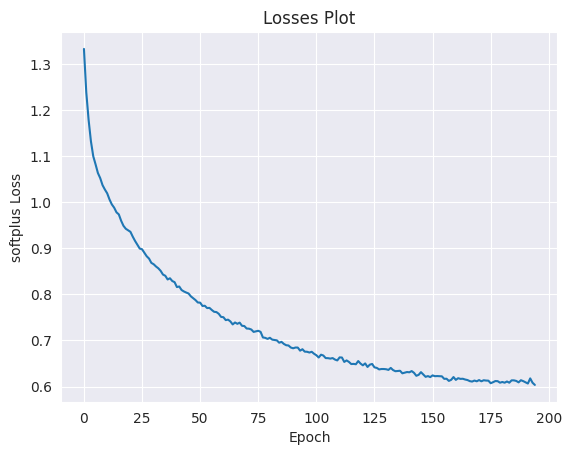

In [ ]:
result = pipeline(
    model = 'TransE',
    loss = "softplus",
    training = training,
    testing = testing,
    validation = validation,
    model_kwargs = dict(embedding_dim=3),  # Increase the embedding dimension
    optimizer = 'Adam',
    optimizer_kwargs=dict(lr=0.01),  # Adjust the learning rate
    training_kwargs=dict(
        num_epochs=300, # Increase the number of epochs
        use_tqdm_batch = False,
    ),
    negative_sampler='bernoulli',
    stopper='early',
    stopper_kwargs=dict(frequency=5, patience=2, relative_delta=0.002),
)

# The trained model is stored in the pipeline result
model = result.model

#plot loss
result.plot_losses()

 ### Evaluations

In [ ]:
# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/1.91k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 2.53s seconds


Hits@1: 0.7560335781741868
Hits@3: 0.772822665267576
Hits@5: 0.781479538300105
Hits@10: 0.7972193074501573
Mean Reciprocal Rank: 0.7711653113365172


###PCA

#### Download font

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

#### Visualization

(-2.0, 2.0)

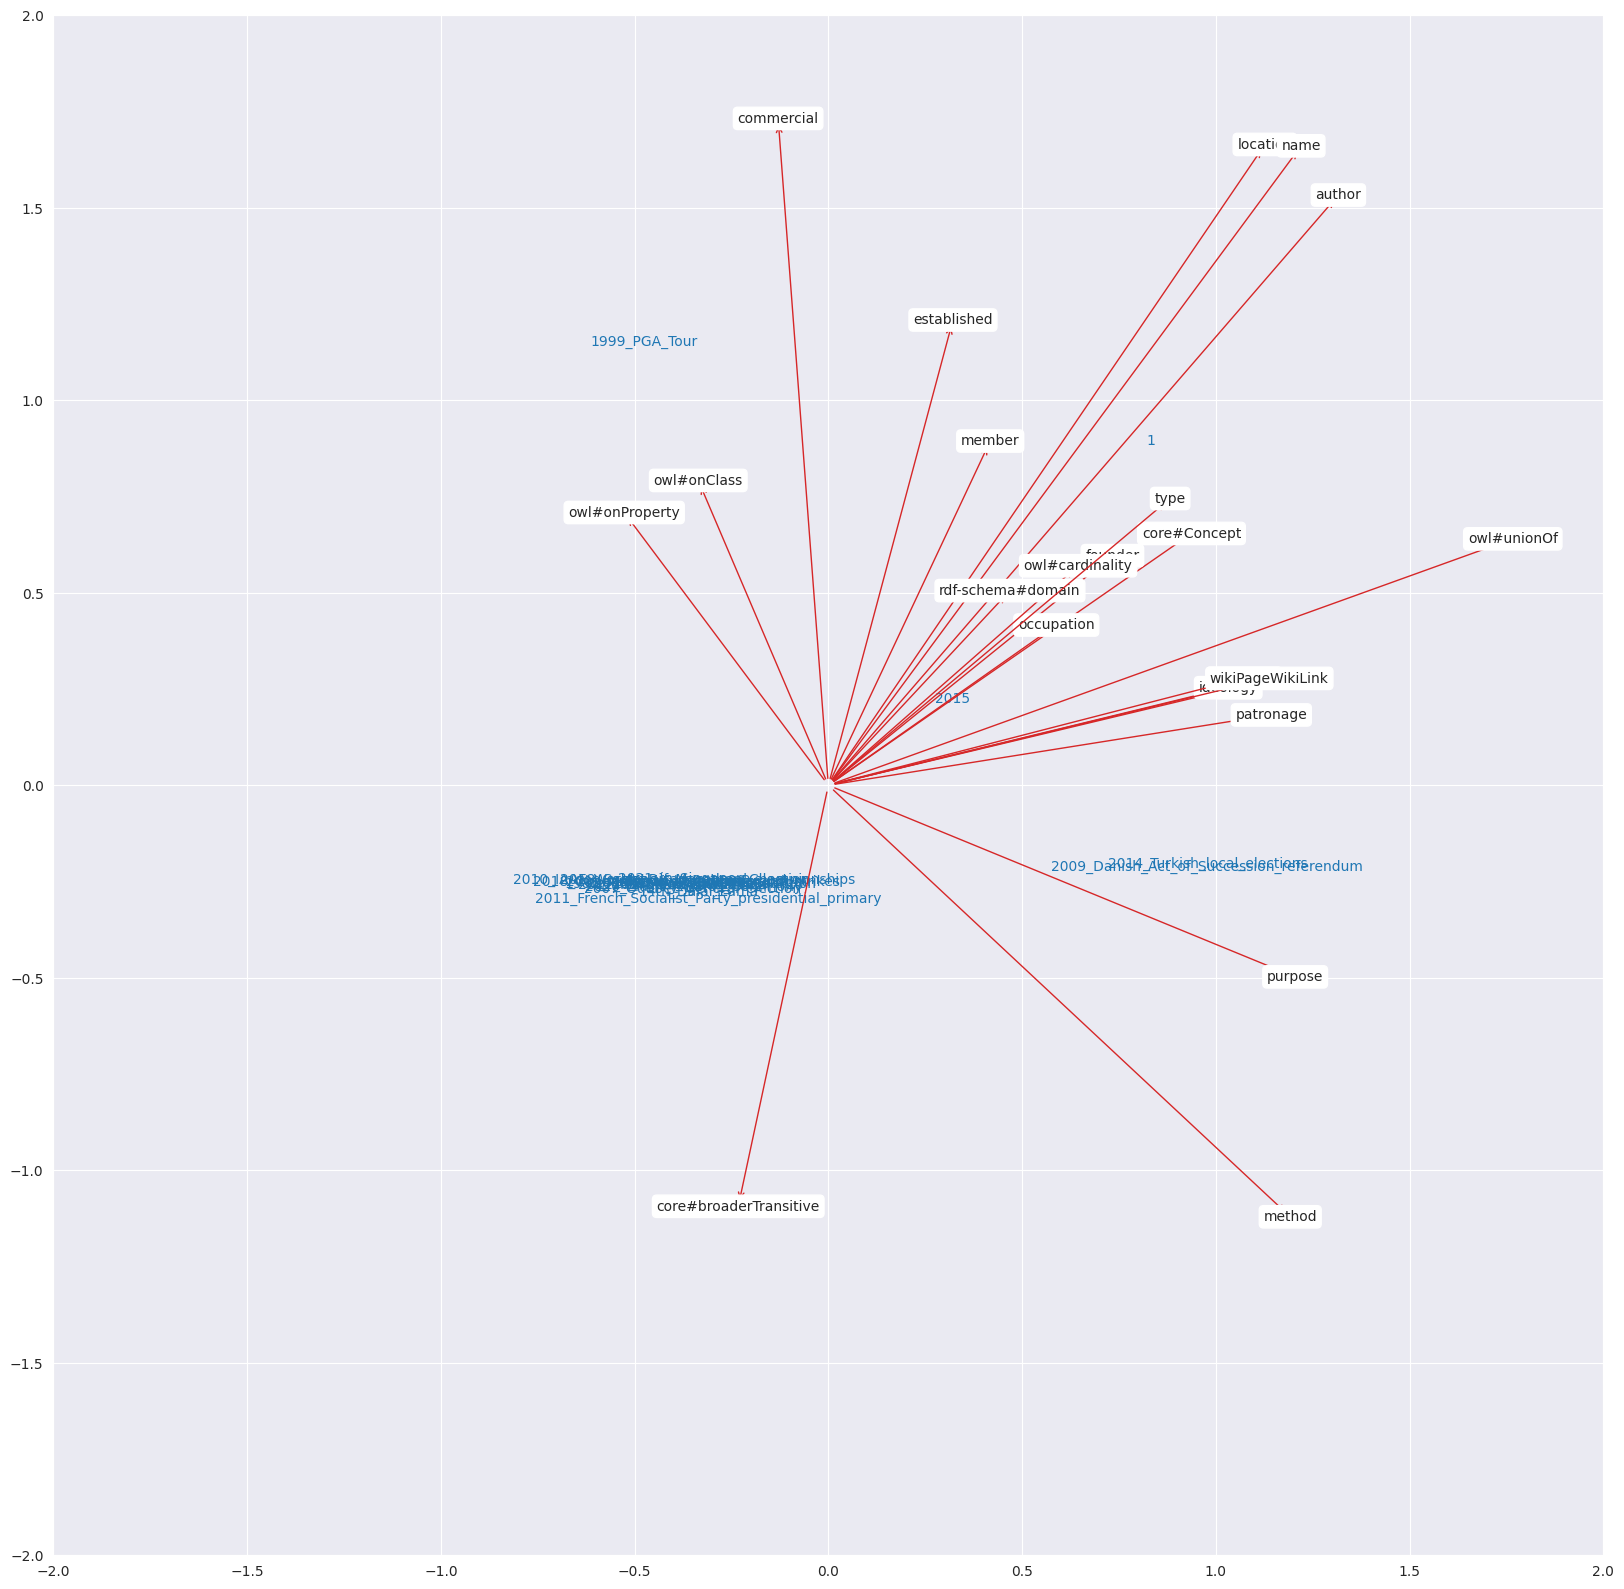

In [ ]:
#Example of PCA
plt.figure(figsize=(20, 20))
pca = PCA(n_components=2)
entity_embeddings = model.entity_representations[0](indices=None).detach().numpy()
m = pca.fit(entity_embeddings)

eu = m.transform(entity_embeddings)
# plt.plot(eu[:, 0], eu[:, 1],'.b')
ct = 0
for i, entity in enumerate(triples_factory.entity_id_to_label):
    plt.annotate(
        text=id_to_entity[entity],
        xy=(eu[i, 0], eu[i, 1]),
        color="tab:blue",
        ha="center", va="center"
    )
    ct += 1
    if(ct==20):
      break


relation_embeddings = model.relation_representations[0](indices=None).detach().numpy()
ru = pca.transform(relation_embeddings)
for i, relation in enumerate(triples_factory.relation_id_to_label):
    plt.annotate(
        text=id_to_relation[relation],
        xy=(0,0), xytext=(ru[i, 0], ru[i, 1]),
        arrowprops=dict(
            arrowstyle="<-",
            color="tab:red",
            shrinkA=5,
            shrinkB=5,
            patchA=None,
            patchB=None,
            connectionstyle="arc3,rad=0."
        ),
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='white', facecolor='white')
    )

plt.xlim([-2, 2])
plt.ylim([-2, 2])


(-2.0, 2.0)

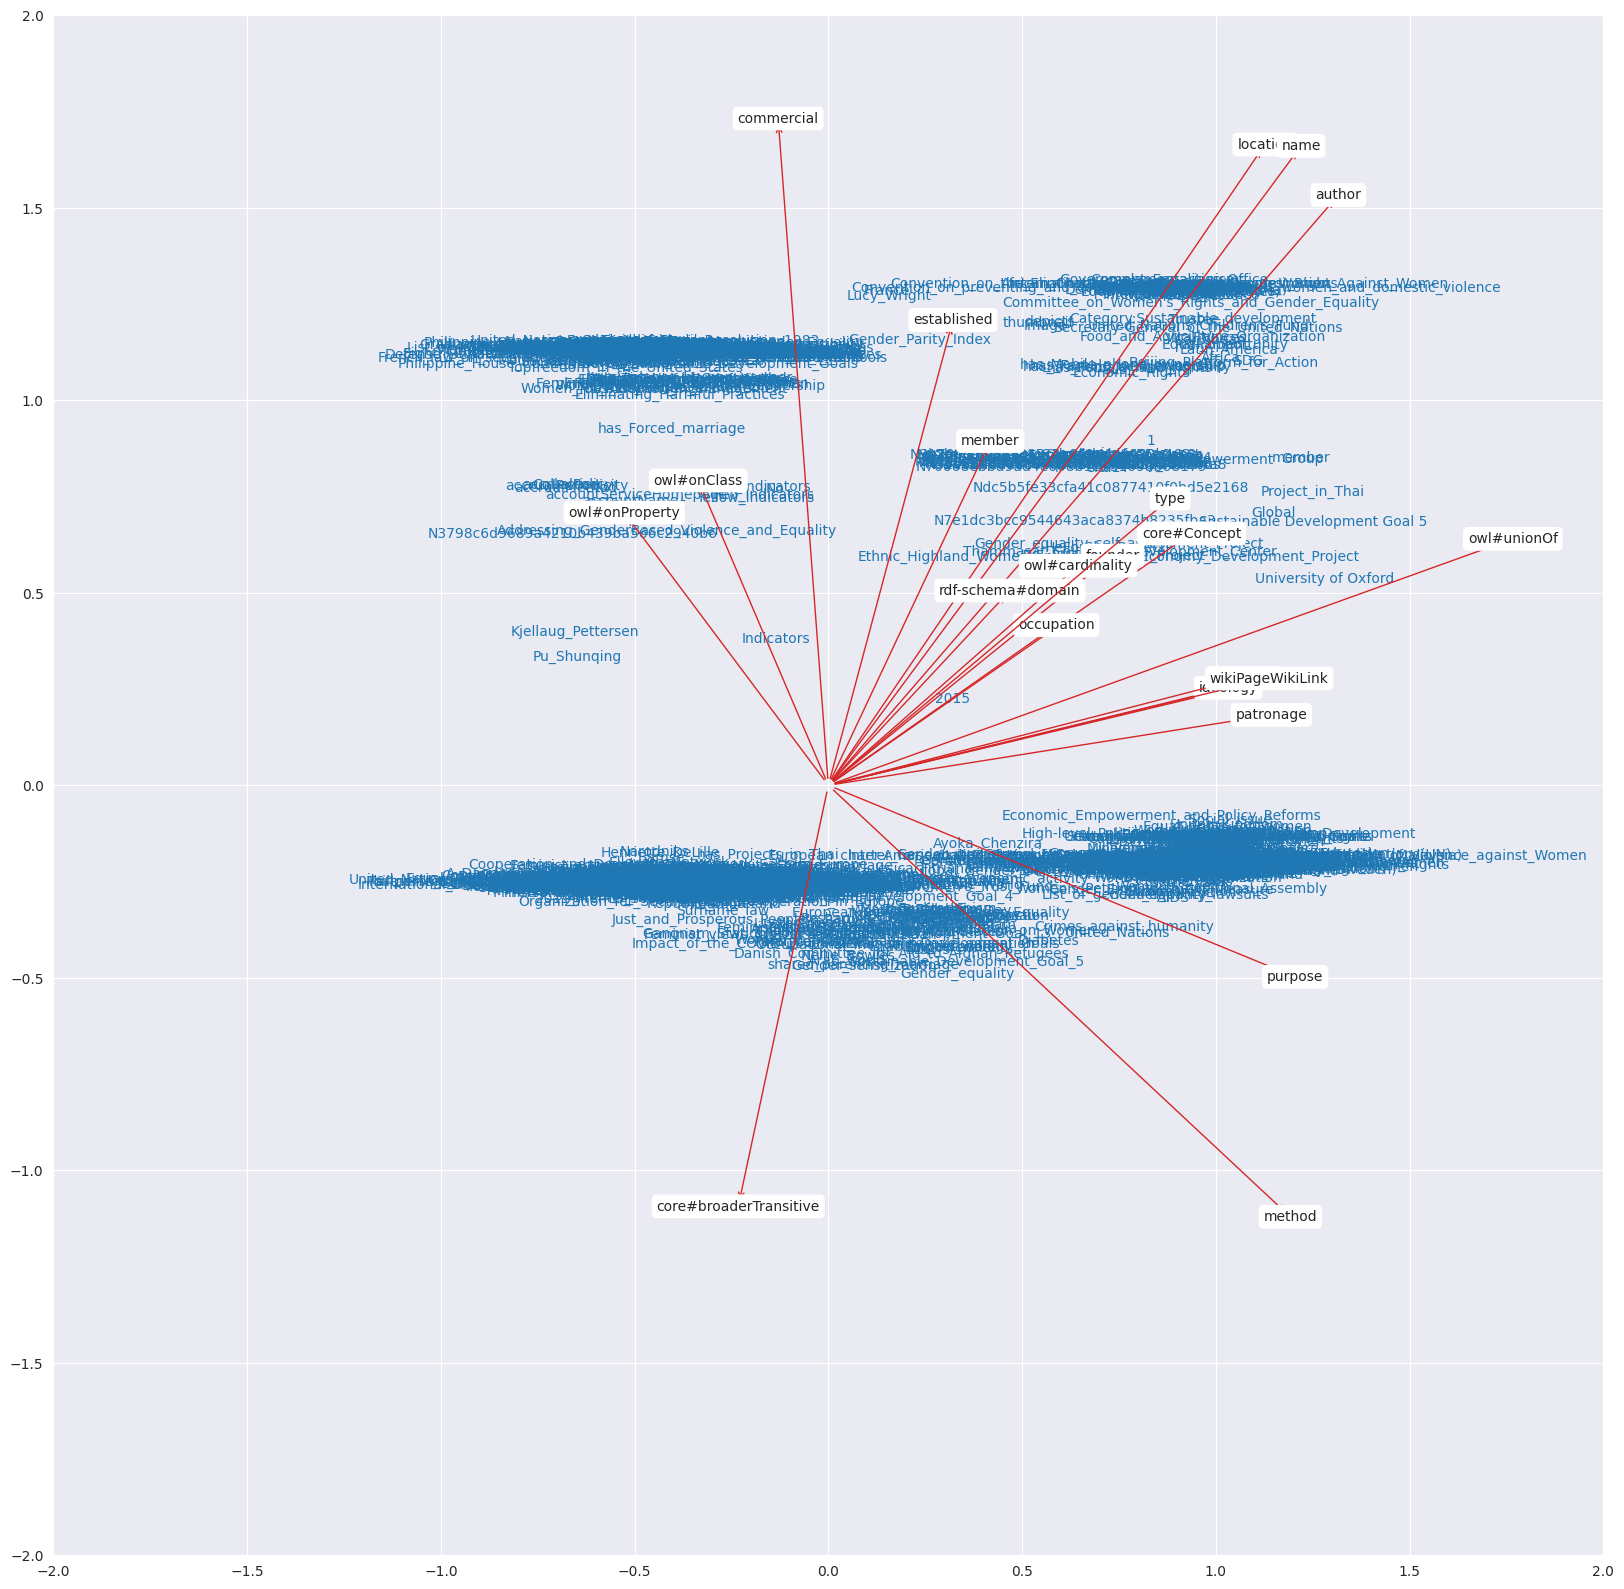

In [ ]:
#Entire PCA
plt.figure(figsize=(20, 20))
pca = PCA(n_components=2)
entity_embeddings = model.entity_representations[0](indices=None).detach().numpy()
m = pca.fit(entity_embeddings)

eu = m.transform(entity_embeddings)
# plt.plot(eu[:, 0], eu[:, 1],'.b')
ct = 0
for i, entity in enumerate(triples_factory.entity_id_to_label):
    plt.annotate(
        text=id_to_entity[entity],
        xy=(eu[i, 0], eu[i, 1]),
        color="tab:blue",
        ha="center", va="center"
    )

relation_embeddings = model.relation_representations[0](indices=None).detach().numpy()
ru = pca.transform(relation_embeddings)
for i, relation in enumerate(triples_factory.relation_id_to_label):
    plt.annotate(
        text=id_to_relation[relation],
        xy=(0,0), xytext=(ru[i, 0], ru[i, 1]),
        arrowprops=dict(
            arrowstyle="<-",
            color="tab:red",
            shrinkA=5,
            shrinkB=5,
            patchA=None,
            patchB=None,
            connectionstyle="arc3,rad=0."
        ),
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='white', facecolor='white')
    )

plt.xlim([-2, 2])
plt.ylim([-2, 2])

#Save model

In [ ]:
torch.save(result.model, 'sdg5.pth')

#Load model

In [ ]:
model = torch.load('sdg5.pth')

In [ ]:
model.eval()

TransE(
  (loss): SoftplusLoss(
    (margin_activation): Softplus(beta=1, threshold=20)
  )
  (interaction): TransEInteraction()
  (entity_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(1761, 3)
    )
  )
  (relation_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(23, 3)
    )
  )
  (weight_regularizers): ModuleList()
)

#Model prediction

###Predict indicator of targets example

In [ ]:
pred_indicator = predict_target(
    model=model,
    tail = "Womens_Participation_and_Leadership",
    relation = "rdf-schema#domain",
    triples_factory = triples_factory,
)
pred_indicator.df.head(15)

,head_id,score,head_label
1696,1696,-0.027906,Womens_Participation_and_Leadership
1743,1743,-0.028828,has_Genital_mutilation
1742,1742,-0.040434,has_Frameworks_for_gender
1272,1272,-0.042067,Reproductive_Health_and_Rights
1752,1752,-0.043141,has_Women_in_management
1754,1754,-0.043249,has_has_Own_health_decisions
400,400,-0.047685,Ending_all_forms_of_Discrimination
1748,1748,-0.052529,has_Time_on_domestic_work
1753,1753,-0.060970,has_Women_in_parlliament
383,383,-0.062993,Eliminate_all_forms_of_violence


###Predict member of indicators

####Green Indicators member

In [ ]:
pred_green = predict_target(
    model=model,
    head = "Green_Indicators",
    relation = "member",
    triples_factory = triples_factory,
)
pred_green.df.head(15)

,tail_id,score,tail_label
616,616,-0.035899,Genital_mutilation
1602,1602,-0.038820,Violence_by_non_partner
1529,1529,-0.041381,Tracking_gender_equality
1685,1685,-0.042208,Women_in_management
531,531,-0.042911,Frameworks_for_gender
1021,1021,-0.043949,Mobile_phone_ownership
1603,1603,-0.044242,Violence_by_partner
468,468,-0.046851,Female_land_rights
1745,1745,-0.049804,has_Own_health_decisions
1143,1143,-0.057019,Own_health_decisions


####Yellow Indicators member

In [ ]:
pred_yellow = predict_target(
    model=model,
    head = "Yellow_Indicators",
    relation = "member",
    triples_factory = triples_factory,
)
pred_yellow.df.head(15)

,tail_id,score,tail_label
468,468,-0.009594,Female_land_rights
1603,1603,-0.012505,Violence_by_partner
1021,1021,-0.012751,Mobile_phone_ownership
1685,1685,-0.013527,Women_in_management
1143,1143,-0.016197,Own_health_decisions
531,531,-0.018444,Frameworks_for_gender
1602,1602,-0.024377,Violence_by_non_partner
1518,1518,-0.025557,Time_on_domestic_work
467,467,-0.025722,Female_land_ownership
1745,1745,-0.028270,has_Own_health_decisions


####Red Indicators member

In [ ]:
pred_red = predict_target(
    model=model,
    head = "Red_Indicators",
    relation = "member",
    triples_factory = triples_factory,
)
pred_red.df.head(15)

,tail_id,score,tail_label
1362,1362,-0.021540,Sexual_health_access
531,531,-0.029541,Frameworks_for_gender
1021,1021,-0.029550,Mobile_phone_ownership
1143,1143,-0.037858,Own_health_decisions
467,467,-0.038653,Female_land_ownership
468,468,-0.039453,Female_land_rights
1603,1603,-0.044826,Violence_by_partner
1685,1685,-0.045816,Women_in_management
616,616,-0.051673,Genital_mutilation
1602,1602,-0.055431,Violence_by_non_partner
